In [1]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np

In [2]:
pricing_dict = {
't2.micro (CPU)': 54.27,
't2.small (CPU)': 62.59,
't2.medium (CPU)': 79.67,
't2.large (CPU)': 113.54,
't2.xlarge (CPU)': 181.29,
't2.2xlarge (CPU)': 367.88,
'p3.2xlarge (GPU)': 2330.80}

In [3]:
number_of_minutes = 1440
times = np.arange(0, number_of_minutes, 1)
times_2_hours = np.arange(0, number_of_minutes, 120)

In [4]:
results_dict = {}
for instance_type in pricing_dict:
    
    results_dict[instance_type] = {}
    results_dict[instance_type]['prices'] = [((pricing_dict[instance_type] / 730) / 60) * time for time in times]
    results_dict[instance_type]['prices_2_hours'] = [((pricing_dict[instance_type] / 730) / 60) * time for time in times_2_hours]

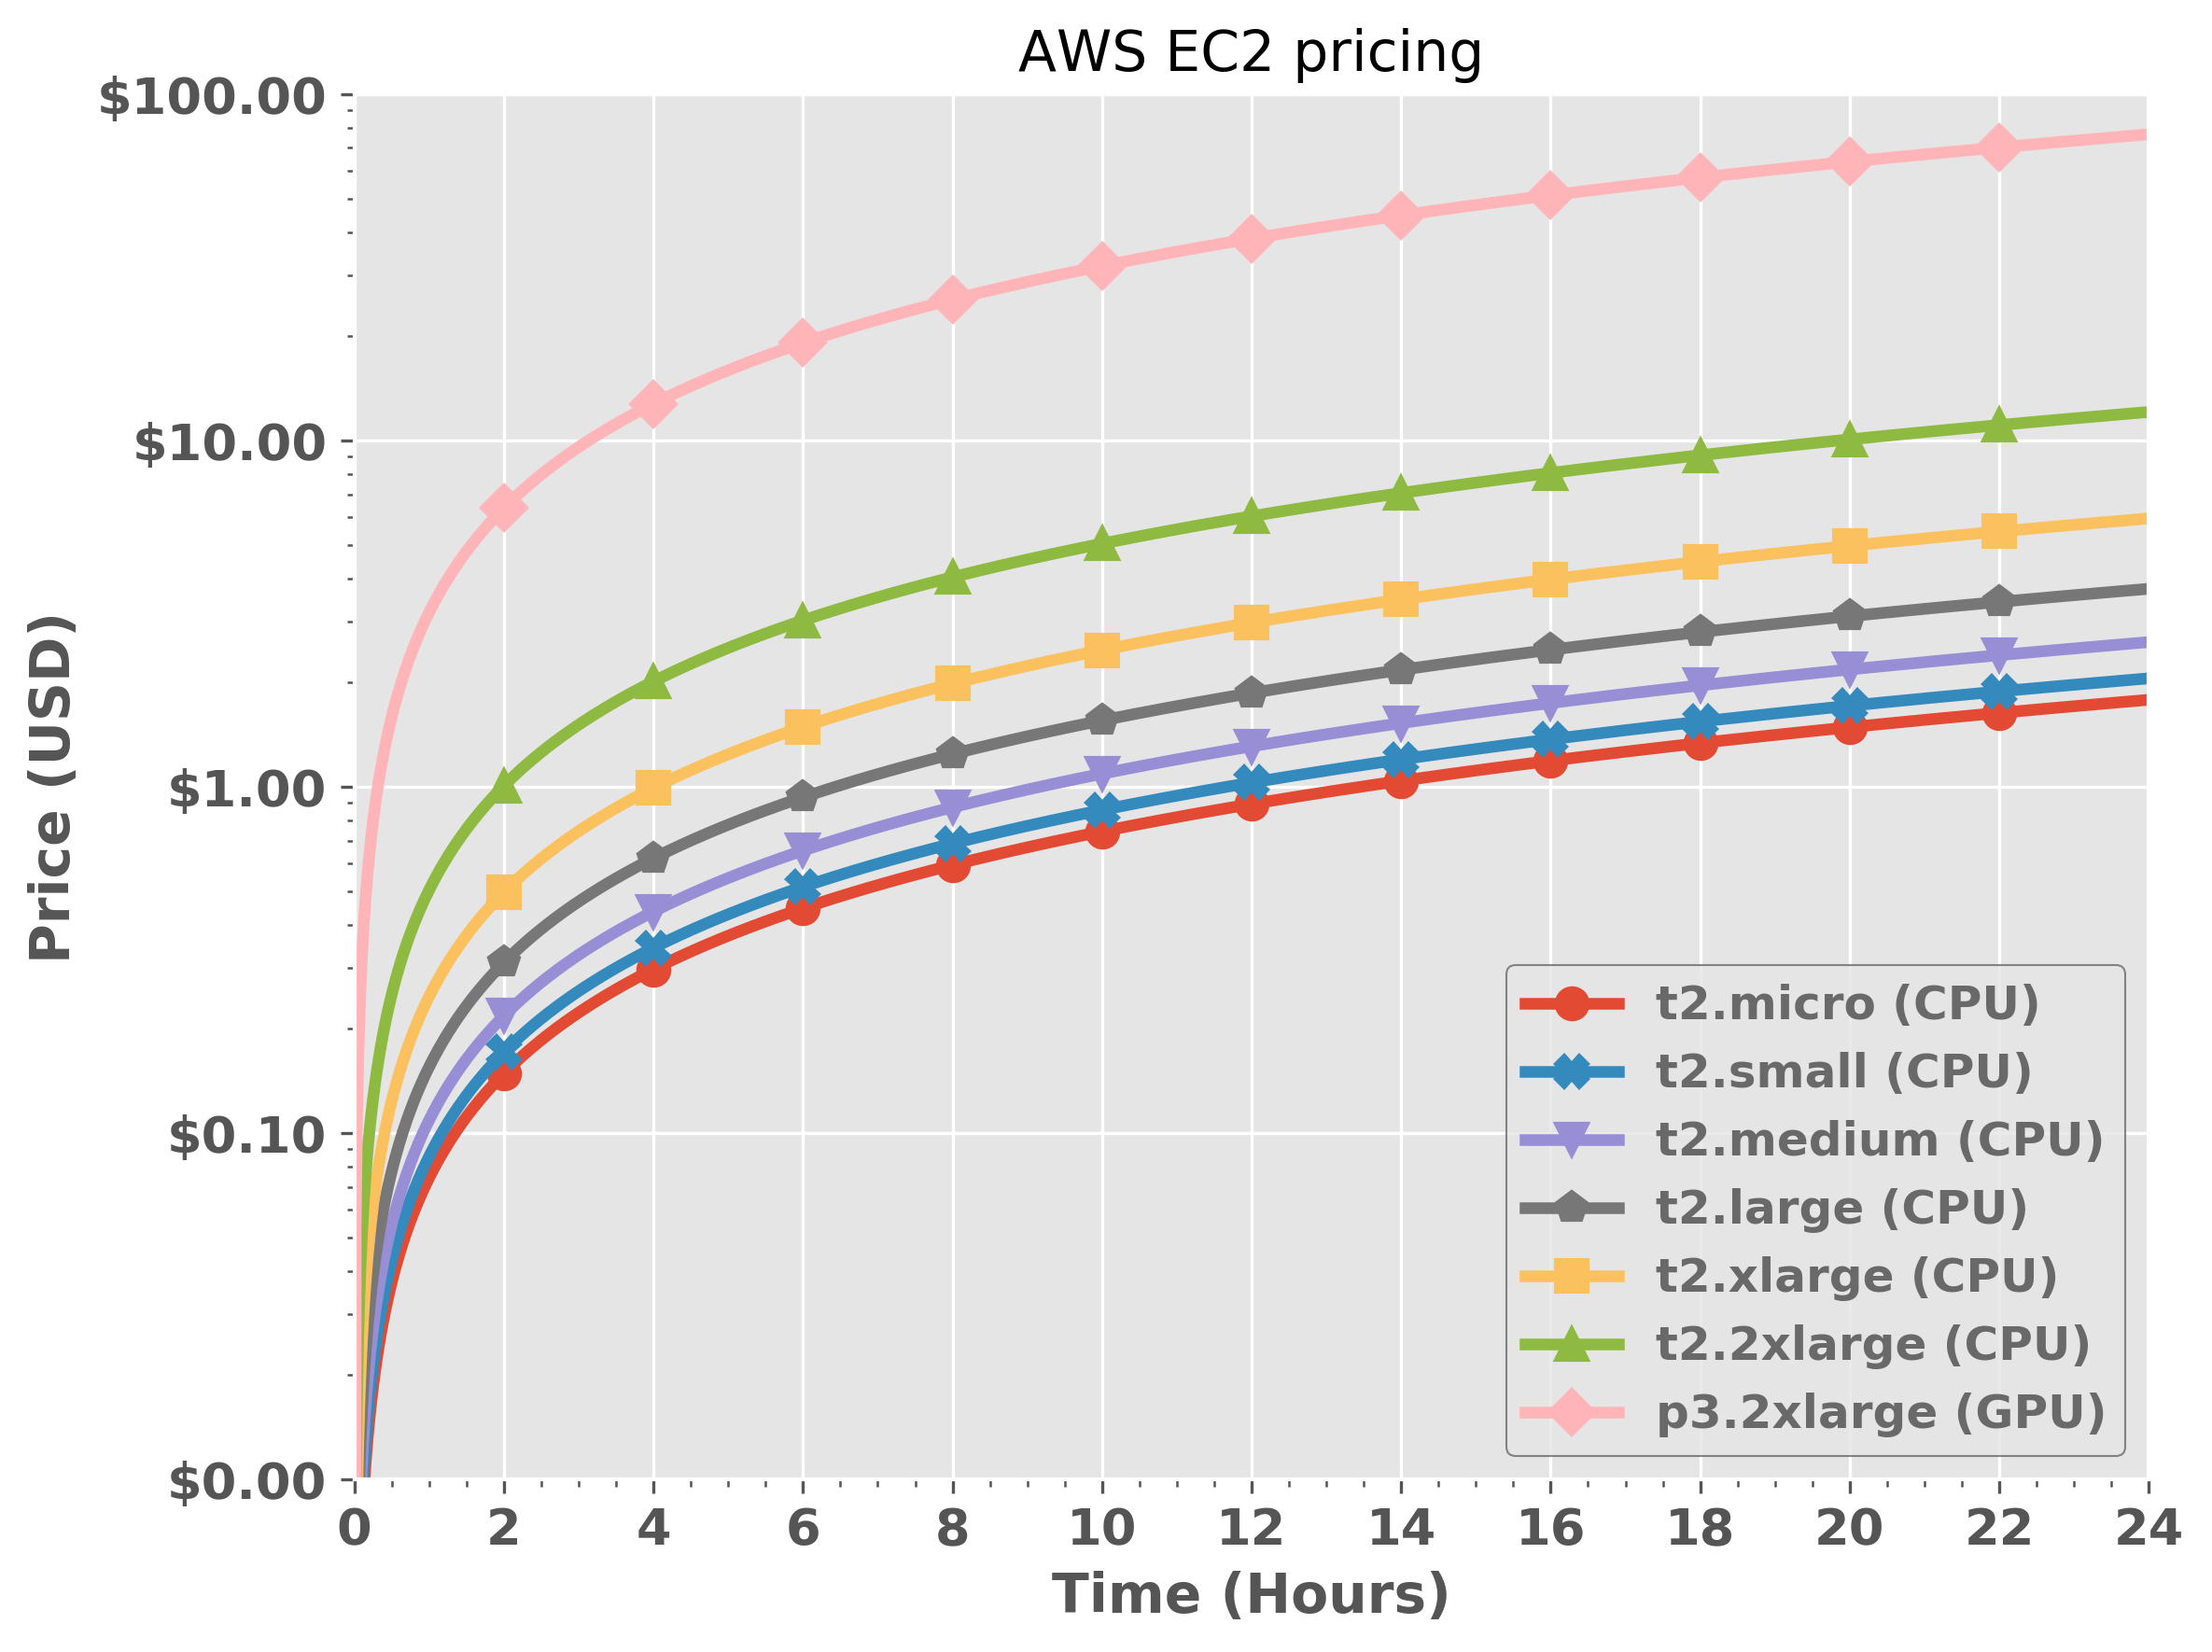

In [5]:
marker = itertools.cycle(('o', 'X', 'v', 'p', 's', '^', 'D')) 
plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111)
plt.yscale('log')
ax.set_title('AWS EC2 pricing')
ax.set_ylabel('Price (USD)', fontweight='bold', fontsize=14)
ax.set_xlabel('Time (Hours)', fontweight='bold', fontsize=14)
for instance_type in results_dict:
    ax.plot(times, results_dict[instance_type]['prices'], 
            linewidth=3, marker=next(marker), markevery=120, markersize=8, label=instance_type)
ax.set_ylim([0.01, 100])
ax.set_xlim([0, number_of_minutes])
ax.set_yticks([0.01, 0.1, 1, 10, 100])
ax.set_yticklabels(['$0.00', '$0.10', '$1.00', '$10.00', '$100.00'], fontweight='bold')
ax.set_xticks(np.arange(0, number_of_minutes + 60, 120))
ax.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24'], fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
legend = plt.legend(edgecolor='dimgray', prop={'weight': 'bold', 'size': 12})
plt.setp(legend.get_texts(), color='dimgray')
plt.tight_layout()
plt.savefig('../figures/aws_pricing.png')